In [1]:
from simple_mesh import Simple_mesh
import os 
import numpy as np 

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
# Go through every PPI_pair_id. 

ppi_pair_ids = []
with open('../pdbbind_database_dimers/pdbbind_dimers_w_affinities.txt') as f:
    for line in f.readlines():
        ppi_pair_id = line.split()[0]
        ppi_pair_ids.append(ppi_pair_id)

In [4]:
surf_dir = '/Users/pgainza/Dropbox/lpdi/MaSIF_Design/PPI_analyses/analysis_protein_ifaces/pdbbind_database_dimers/01-benchmark_surfaces'




In [5]:
# Compute the error between the vertices in 3D and the MDS embedding of these vertices
from sklearn.metrics import pairwise_distances
def compute_mds_error(vertices_3D, vertices_2D ):


    # Compute all pairwise distances in 3D
    dists3D = pairwise_distances(vertices_3D)
    # Compute all pairwise distances in 2D
    dists2D = pairwise_distances(vertices_2D)
    
    # Error 
    error = dists3D - dists2D
    error = np.sqrt(np.mean(np.square(error)))
    return error

In [6]:
from sklearn.manifold import MDS
from IPython.core.debugger import set_trace

mds_errors = {}
mds_areas = {}

for ppi_pair_id in ppi_pair_ids:
#for ppi_pair_id in ['4ZQK_A_B']:
    pdbid = ppi_pair_id.split('_')[0]
    chain = []
    chain.append(ppi_pair_id.split('_')[1])
    chain.append(ppi_pair_id.split('_')[2])
    pids = ['p1', 'p2']

    for ix, pid in enumerate(pids):
        plyfile = os.path.join(surf_dir, '{}_{}.ply'.format(pdbid, chain[ix]))
        plyfile_partner = os.path.join(surf_dir, '{}_{}.ply'.format(pdbid, chain[(ix+1)%2]))

        try:
            mesh = Simple_mesh()
            mesh.load_mesh(plyfile)
        except: 
            print(f'error loading {plyfile}')
            continue

        try: 
            iface = mesh.get_attribute('vertex_iface')
            iface_pos = np.where(iface > 0)[0]
        except: 
            print(f'Error loading iface for {plyfile}')
        
        #mesh.add_attribute('vertex_area')
        # Approximate areas by assuming they all have an area of 2.
        areas = 2*np.ones_like(iface)
        #areas = mesh.get_attribute('vertex_area')
        
        v_iface3D = mesh.vertices[iface_pos]
        if len(v_iface3D) < 3:
            continue
        
        try:
            embedding = MDS(n_components=2, metric=True)
            v_iface2D = embedding.fit_transform(v_iface3D)
        except:
            continue
        
        try:
            error = compute_mds_error(v_iface3D, v_iface2D)
        except: 
            continue
        
        mds_errors[(ppi_pair_id,pid)] = error
        mds_areas[(ppi_pair_id,pid)] = areas[iface_pos]
        print("{} MDS embedding root mean square error for {} : {}".format(len(mds_errors.keys()), ppi_pair_id, error))

        
        

1 MDS embedding root mean square error for 5gjk_A_B : 0.40754557631516336
2 MDS embedding root mean square error for 5gjk_A_B : 0.4181220253113591
3 MDS embedding root mean square error for 2hsq_A_B : 0.7190627557996627
4 MDS embedding root mean square error for 2hsq_A_B : 0.5825599068253788
5 MDS embedding root mean square error for 5d1k_A_B : 1.3097303565904326
6 MDS embedding root mean square error for 5d1k_A_B : 1.1189918319324632
7 MDS embedding root mean square error for 4b93_A_B : 0.2155765160438295
8 MDS embedding root mean square error for 4b93_A_B : 0.3857212422986197
9 MDS embedding root mean square error for 1ydi_A_B : 0.9113193541888573
10 MDS embedding root mean square error for 1ydi_A_B : 0.7203635743308985
11 MDS embedding root mean square error for 5c3f_A_B : 0.582725646914811
12 MDS embedding root mean square error for 5c3f_A_B : 0.5273250685381221
13 MDS embedding root mean square error for 3h6g_A_B : 0.2240997005503649
14 MDS embedding root mean square error for 3h6

110 MDS embedding root mean square error for 4ksd_A_B : 0.7529476901514325
111 MDS embedding root mean square error for 4ksd_A_B : 0.8174795746671615
112 MDS embedding root mean square error for 3n4i_A_B : 1.0428685791391343
113 MDS embedding root mean square error for 3n4i_A_B : 0.8197777450339321
114 MDS embedding root mean square error for 2g2w_A_B : 0.7338990488851957
115 MDS embedding root mean square error for 2g2w_A_B : 0.7616838191188895
116 MDS embedding root mean square error for 2b7c_A_B : 1.3080634856684477
117 MDS embedding root mean square error for 2b7c_A_B : 1.565668041636824
118 MDS embedding root mean square error for 1rke_A_B : 1.0411040459764587
119 MDS embedding root mean square error for 1rke_A_B : 1.2364640603016699
120 MDS embedding root mean square error for 4euk_A_B : 1.0822561743915609
121 MDS embedding root mean square error for 4euk_A_B : 0.3904983304472004
122 MDS embedding root mean square error for 1ay7_A_B : 1.007007928529012
123 MDS embedding root mean

221 MDS embedding root mean square error for 5oyl_A_D : 0.723443522498391
222 MDS embedding root mean square error for 4iop_A_B : 0.31011979470106055
223 MDS embedding root mean square error for 4iop_A_B : 0.2571898805726789
224 MDS embedding root mean square error for 6fc3_A_B : 1.5265117713076553
225 MDS embedding root mean square error for 6fc3_A_B : 1.4577249040973397
error loading /Users/pgainza/Dropbox/lpdi/MaSIF_Design/PPI_analyses/analysis_protein_ifaces/pdbbind_database_dimers/01-benchmark_surfaces/3gb8_A.ply
error loading /Users/pgainza/Dropbox/lpdi/MaSIF_Design/PPI_analyses/analysis_protein_ifaces/pdbbind_database_dimers/01-benchmark_surfaces/3gb8_B.ply
226 MDS embedding root mean square error for 4jeh_A_B : 1.407432343858879
227 MDS embedding root mean square error for 4jeh_A_B : 1.2882109984312688
228 MDS embedding root mean square error for 4jw2_A_B : 0.688572075679871
229 MDS embedding root mean square error for 4jw2_A_B : 0.6823294502530921
error loading /Users/pgainza/

316 MDS embedding root mean square error for 4krl_B_A : 0.27904194949840505
317 MDS embedding root mean square error for 4krl_B_A : 0.294750607925492
318 MDS embedding root mean square error for 1t63_A_B : 0.7640439504736078
319 MDS embedding root mean square error for 1t63_A_B : 0.6433088031968683
error loading /Users/pgainza/Dropbox/lpdi/MaSIF_Design/PPI_analyses/analysis_protein_ifaces/pdbbind_database_dimers/01-benchmark_surfaces/3znz_A.ply
error loading /Users/pgainza/Dropbox/lpdi/MaSIF_Design/PPI_analyses/analysis_protein_ifaces/pdbbind_database_dimers/01-benchmark_surfaces/3znz_B.ply
error loading /Users/pgainza/Dropbox/lpdi/MaSIF_Design/PPI_analyses/analysis_protein_ifaces/pdbbind_database_dimers/01-benchmark_surfaces/1te1_A.ply
error loading /Users/pgainza/Dropbox/lpdi/MaSIF_Design/PPI_analyses/analysis_protein_ifaces/pdbbind_database_dimers/01-benchmark_surfaces/1te1_B.ply
error loading /Users/pgainza/Dropbox/lpdi/MaSIF_Design/PPI_analyses/analysis_protein_ifaces/pdbbind_data

392 MDS embedding root mean square error for 4w6x_A_B : 0.557984636263074
393 MDS embedding root mean square error for 2oob_A_B : 0.26874831255108766
394 MDS embedding root mean square error for 2oob_A_B : 0.354336881816762
395 MDS embedding root mean square error for 6isc_A_B : 0.31695680498060963
396 MDS embedding root mean square error for 6isc_A_B : 0.31894860295461824
error loading /Users/pgainza/Dropbox/lpdi/MaSIF_Design/PPI_analyses/analysis_protein_ifaces/pdbbind_database_dimers/01-benchmark_surfaces/1us7_A.ply
error loading /Users/pgainza/Dropbox/lpdi/MaSIF_Design/PPI_analyses/analysis_protein_ifaces/pdbbind_database_dimers/01-benchmark_surfaces/1us7_B.ply
397 MDS embedding root mean square error for 2fju_A_B : 1.1820053823603078
398 MDS embedding root mean square error for 2fju_A_B : 0.5777905625032841
399 MDS embedding root mean square error for 3ch5_A_B : 0.6900888560930054
400 MDS embedding root mean square error for 3ch5_A_B : 0.5782930696411435
401 MDS embedding root mea

496 MDS embedding root mean square error for 1smf_E_I : 1.0000431054844856
497 MDS embedding root mean square error for 1smf_E_I : 0.7711933888760033
498 MDS embedding root mean square error for 4did_A_B : 1.4305166906579785
499 MDS embedding root mean square error for 4did_A_B : 1.2250290542669926
500 MDS embedding root mean square error for 4nu1_A_B : 1.006597082993832
501 MDS embedding root mean square error for 4nu1_A_B : 0.6544461051965369
502 MDS embedding root mean square error for 2voi_A_B : 0.7585236236672895
503 MDS embedding root mean square error for 2voi_A_B : 0.6038888098371428
504 MDS embedding root mean square error for 5vko_A_B : 1.6994129392725228
505 MDS embedding root mean square error for 5vko_A_B : 1.7143560451430695
506 MDS embedding root mean square error for 3zwz_A_B : 1.156398453895819
507 MDS embedding root mean square error for 3zwz_A_B : 0.8399276647114133
508 MDS embedding root mean square error for 5l8j_A_B : 0.9464022949569787
509 MDS embedding root mean

596 MDS embedding root mean square error for 3ukz_B_C : 0.8013356023229652
597 MDS embedding root mean square error for 1ri8_A_B : 0.6462931518834799
598 MDS embedding root mean square error for 1ri8_A_B : 0.7559901043083227
599 MDS embedding root mean square error for 5mtj_A_B : 0.4921780379265969
600 MDS embedding root mean square error for 5mtj_A_B : 0.3966461664248084
601 MDS embedding root mean square error for 2g2u_A_B : 0.8719841399178798
602 MDS embedding root mean square error for 2g2u_A_B : 0.792754281156608
603 MDS embedding root mean square error for 4wen_A_B : 0.6568763766055516
604 MDS embedding root mean square error for 4wen_A_B : 0.5163431364526098
605 MDS embedding root mean square error for 5wgg_A_B : 0.6999738387865527
606 MDS embedding root mean square error for 5wgg_A_B : 0.1883888048820128
607 MDS embedding root mean square error for 4hep_A_G : 0.2779079403004946
608 MDS embedding root mean square error for 4hep_A_G : 0.30245796947604286
609 MDS embedding root me

698 MDS embedding root mean square error for 4x33_A_B : 0.5164801880048353
699 MDS embedding root mean square error for 6fg8_A_B : 0.651919439593539
700 MDS embedding root mean square error for 6fg8_A_B : 0.7299547099715696
701 MDS embedding root mean square error for 1dpj_A_B : 1.4392262448444355
702 MDS embedding root mean square error for 1dpj_A_B : 1.0291396897851575
703 MDS embedding root mean square error for 2wy8_A_Q : 0.35670640808957577
704 MDS embedding root mean square error for 2wy8_A_Q : 0.34371092741746256
705 MDS embedding root mean square error for 6fub_B_A : 0.9136265752769335
706 MDS embedding root mean square error for 6fub_B_A : 0.8180327955099338
707 MDS embedding root mean square error for 2sni_E_I : 0.695541206567021
708 MDS embedding root mean square error for 2sni_E_I : 0.7168834539083446
709 MDS embedding root mean square error for 4kt1_A_E : 0.5145103883040971
710 MDS embedding root mean square error for 4kt1_A_E : 0.9785483409617108
711 MDS embedding root me

809 MDS embedding root mean square error for 5ufe_A_B : 0.488834966402531
810 MDS embedding root mean square error for 5ufe_A_B : 0.5515626387972932
811 MDS embedding root mean square error for 4etp_A_B : 0.28782497717544525
812 MDS embedding root mean square error for 4etp_A_B : 0.3988193874863481
813 MDS embedding root mean square error for 3v1c_A_B : 0.4658836120994806
814 MDS embedding root mean square error for 3v1c_A_B : 0.8222594987862936
815 MDS embedding root mean square error for 3zkq_A_D : 0.4578979135439367
816 MDS embedding root mean square error for 3zkq_A_D : 0.6185265777968737
817 MDS embedding root mean square error for 2ot3_A_B : 0.9574522718171856
818 MDS embedding root mean square error for 2ot3_A_B : 0.9545614718534342
819 MDS embedding root mean square error for 2uyz_A_B : 0.5010407735633996
820 MDS embedding root mean square error for 2uyz_A_B : 0.5232820456612792
821 MDS embedding root mean square error for 2ftl_E_I : 1.0289990348516724
822 MDS embedding root me

917 MDS embedding root mean square error for 1v18_A_B : 0.5664903870446742
918 MDS embedding root mean square error for 3qq8_A_B : 1.0321290977508035
919 MDS embedding root mean square error for 3qq8_A_B : 0.7658190720647325
920 MDS embedding root mean square error for 1mah_A_F : 2.0496278639336984
921 MDS embedding root mean square error for 1mah_A_F : 1.0931321572436266
922 MDS embedding root mean square error for 5mv8_A_B : 1.4540952328899555
923 MDS embedding root mean square error for 5mv8_A_B : 1.4850511839253575
924 MDS embedding root mean square error for 4yl8_A_B : 1.2701872063712478
925 MDS embedding root mean square error for 4yl8_A_B : 0.4784163712535099
926 MDS embedding root mean square error for 3c4o_A_B : 0.9449598138455202
927 MDS embedding root mean square error for 3c4o_A_B : 0.6907282009414561
928 MDS embedding root mean square error for 2ftm_A_B : 1.1793985562732168
929 MDS embedding root mean square error for 2ftm_A_B : 0.6681169229748052
930 MDS embedding root me

1019 MDS embedding root mean square error for 1oc0_A_B : 0.5666703806595089
1020 MDS embedding root mean square error for 2hrk_A_B : 0.3566958513336947
1021 MDS embedding root mean square error for 2hrk_A_B : 0.4632231575886113
1022 MDS embedding root mean square error for 1r0r_E_I : 0.6544087912959397
1023 MDS embedding root mean square error for 1r0r_E_I : 1.0300358805149161
1024 MDS embedding root mean square error for 3ona_A_B : 0.4737577878017469
1025 MDS embedding root mean square error for 3ona_A_B : 0.35680647561272955
1026 MDS embedding root mean square error for 5mtn_A_B : 0.9695577910553219
1027 MDS embedding root mean square error for 5mtn_A_B : 0.8587309151325141
1028 MDS embedding root mean square error for 3sjh_A_B : 0.6542683901603523
1029 MDS embedding root mean square error for 3sjh_A_B : 0.6453578431696538
1030 MDS embedding root mean square error for 1fy8_E_I : 0.9272326254762637
1031 MDS embedding root mean square error for 1fy8_E_I : 0.7811724586153556
1032 MDS em

1125 MDS embedding root mean square error for 5oy9_A_D : 1.4037707745724664
1126 MDS embedding root mean square error for 5oy9_A_D : 0.5212593968934569
1127 MDS embedding root mean square error for 6hul_A_B : 0.5405055448600359
1128 MDS embedding root mean square error for 6hul_A_B : 0.5954658559953252
1129 MDS embedding root mean square error for 4l67_A_B : 0.5140365491057362
1130 MDS embedding root mean square error for 4l67_A_B : 0.49676617490710906
1131 MDS embedding root mean square error for 2wd5_A_B : 0.7425265082537625
1132 MDS embedding root mean square error for 2wd5_A_B : 0.7152853645848287
1133 MDS embedding root mean square error for 4j32_A_B : 0.5840961576350823
1134 MDS embedding root mean square error for 4j32_A_B : 0.24110450570808348
1135 MDS embedding root mean square error for 5f4e_A_B : 0.6011665540147585
1136 MDS embedding root mean square error for 5f4e_A_B : 0.5567022488105792
1137 MDS embedding root mean square error for 5eg3_A_B : 0.5870820588680787
1138 MDS e

1223 MDS embedding root mean square error for 3bs5_A_B : 1.0953219287270082
1224 MDS embedding root mean square error for 3bs5_A_B : 0.47984455219241773
1225 MDS embedding root mean square error for 5o90_A_B : 0.5860583908672468
1226 MDS embedding root mean square error for 5o90_A_B : 0.46797790218822644
1227 MDS embedding root mean square error for 3olm_A_D : 0.8791544463376677
1228 MDS embedding root mean square error for 3olm_A_D : 1.1242277745803748
1229 MDS embedding root mean square error for 1u0s_Y_A : 0.5637686373541281
1230 MDS embedding root mean square error for 1u0s_Y_A : 0.5494518597995716
1231 MDS embedding root mean square error for 5szh_A_B : 0.7926913474381874
1232 MDS embedding root mean square error for 5szh_A_B : 1.3325287071342364
1233 MDS embedding root mean square error for 2xgy_A_B : 0.5982425207232119
1234 MDS embedding root mean square error for 2xgy_A_B : 1.0093269606708295
1235 MDS embedding root mean square error for 2gww_A_B : 0.7700408780195943
1236 MDS e

1313 MDS embedding root mean square error for 4rey_A_B : 1.3686534580343692
1314 MDS embedding root mean square error for 4rey_A_B : 1.3164592039959704
1315 MDS embedding root mean square error for 6ff3_A_B : 0.4606926832242782
1316 MDS embedding root mean square error for 6ff3_A_B : 0.33673789691396744
1317 MDS embedding root mean square error for 1kac_A_B : 0.21062958478526259
1318 MDS embedding root mean square error for 1kac_A_B : 0.4209325622624125
1319 MDS embedding root mean square error for 4c5g_A_B : 0.5502138292923062
1320 MDS embedding root mean square error for 4c5g_A_B : 0.4404322065819592
1321 MDS embedding root mean square error for 1y33_E_I : 0.9218155520190154
1322 MDS embedding root mean square error for 1y33_E_I : 1.106278103194296
1323 MDS embedding root mean square error for 3tnf_A_B : 1.655966499550139
1324 MDS embedding root mean square error for 3tnf_A_B : 1.6893665148279757
1325 MDS embedding root mean square error for 3sgb_E_I : 0.9098479443459154
1326 MDS emb

In [7]:
mds_errors.keys()

dict_keys([('5gjk_A_B', 'p1'), ('5gjk_A_B', 'p2'), ('2hsq_A_B', 'p1'), ('2hsq_A_B', 'p2'), ('5d1k_A_B', 'p1'), ('5d1k_A_B', 'p2'), ('4b93_A_B', 'p1'), ('4b93_A_B', 'p2'), ('1ydi_A_B', 'p1'), ('1ydi_A_B', 'p2'), ('5c3f_A_B', 'p1'), ('5c3f_A_B', 'p2'), ('3h6g_A_B', 'p1'), ('3h6g_A_B', 'p2'), ('4lgr_A_B', 'p1'), ('4lgr_A_B', 'p2'), ('2p47_A_B', 'p1'), ('2p47_A_B', 'p2'), ('1mzw_A_B', 'p1'), ('1mzw_A_B', 'p2'), ('4dj9_A_B', 'p1'), ('4dj9_A_B', 'p2'), ('2hev_F_R', 'p1'), ('2hev_F_R', 'p2'), ('1jtd_A_B', 'p1'), ('1jtd_A_B', 'p2'), ('3fpu_A_B', 'p1'), ('3fpu_A_B', 'p2'), ('2vdb_A_B', 'p1'), ('2vdb_A_B', 'p2'), ('5fr2_A_B', 'p1'), ('5fr2_A_B', 'p2'), ('2jod_A_B', 'p1'), ('2jod_A_B', 'p2'), ('1kxp_A_D', 'p1'), ('1kxp_A_D', 'p2'), ('4jeu_A_B', 'p1'), ('4jeu_A_B', 'p2'), ('2v4z_A_B', 'p1'), ('1y4d_E_I', 'p1'), ('1y4d_E_I', 'p2'), ('4m0w_A_B', 'p1'), ('4m0w_A_B', 'p2'), ('1xj7_A_B', 'p1'), ('1xj7_A_B', 'p2'), ('5gpg_A_B', 'p1'), ('5gpg_A_B', 'p2'), ('3ouw_A_B', 'p1'), ('3ouw_A_B', 'p2'), ('1bvn_P_

In [8]:
mds_areas[('5ggv_Y', 'p1')]

KeyError: ('5ggv_Y', 'p1')

In [9]:

all_keys = [x for x in mds_errors if sum(mds_areas[x]) > 300 and sum(mds_areas[x]) < 2000]

errors_array = [mds_errors[x] for x in all_keys]
errors_areas = [np.sum(mds_areas[x]) for x in all_keys]

In [10]:
len(mds_areas.keys())

1380

In [11]:
len(all_keys)

1063

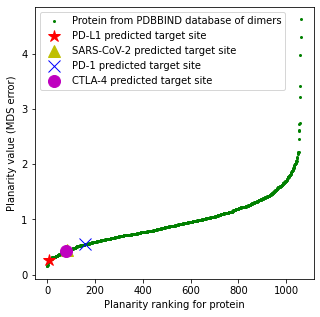

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(5,5))
errors_array_sorted = sorted(errors_array)
plt.plot(errors_array_sorted, 'go--', linewidth=0, markersize=2)

# Plot 5JDS interface
#pdl1_5jds_index = all_keys.index(('5jds_B_A','p2'))
#pdl1_5jds_sorted_index = np.sum(errors_array_sorted <= errors_array[pdl1_5jds_index])
#plt.plot( pdl1_5jds_sorted_index, errors_array[pdl1_5jds_index], 'bx', markersize=12)

# Plot 5JDS interface used
pdl1_5jds_interface_used_sorted_index = np.sum(errors_array_sorted <= target_5JDS_planarity)
plt.plot( pdl1_5jds_interface_used_sorted_index, target_5JDS_planarity, 'r*', markersize=12)

# Plot RBD interface used
rbd_interface_used_sorted_index = np.sum(errors_array_sorted <= target_RBD_planarity)
plt.plot( rbd_interface_used_sorted_index, target_RBD_planarity, 'y^', markersize=12)

# Plot PD-1 interface used
pd1_interface_used_sorted_index = np.sum(errors_array_sorted <= target_PD1_planarity)
plt.plot( pd1_interface_used_sorted_index, target_PD1_planarity, 'bx', markersize=12)

# Plot CTLA-4 interface used
ctla4_interface_used_sorted_index = np.sum(errors_array_sorted <= target_CTLA4_planarity)
plt.plot( ctla4_interface_used_sorted_index, target_CTLA4_planarity, 'mo', markersize=12)

# Plot 4ZQK interface used
#pdl1_4zqk_interface_used_sorted_index = np.sum(errors_array_sorted <= target_4ZQK_planarity)
#plt.plot( pdl1_4zqk_interface_used_sorted_index, target_4ZQK_planarity, 'y^', markersize=12)

# Plot 5JDS interface
#pdl1_4zqk_index = all_keys.index(('4ZQK_A_B','p1'))
#pdl1_4zqk_sorted_index = np.sum(errors_array_sorted <= errors_array[pdl1_4zqk_index])
#plt.plot( pdl1_4zqk_sorted_index, errors_array[pdl1_4zqk_index], 'bx', markersize=12

plt.ylabel('Planarity value (MDS error)')
plt.xlabel('Planarity ranking for protein')
plt.legend(['Protein from PDBBIND database of dimers', 'PD-L1 predicted target site', 'SARS-CoV-2 predicted target site', 'PD-1 predicted target site', 'CTLA-4 predicted target site'])
plt.savefig('planarity_ranking_w_ctla4.png', dpi=300)

In [31]:
pdl1_5jds_interface_used_sorted_index

8

In [32]:
rbd_interface_used_sorted_index

82

In [33]:
pd1_interface_used_sorted_index

155

In [34]:
len(errors_array_sorted)

1063

<AxesSubplot:xlabel='x', ylabel='y'>

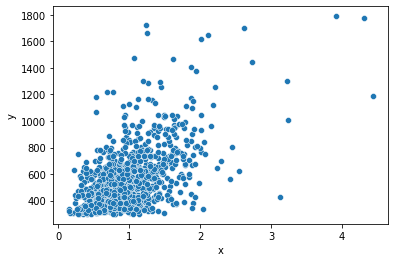

In [99]:
import pandas as pd
#df = pd.DataFrame(np.asarray([errors_array,errors_areas]).T, columns=['Planarity score', 'Area of Interface' ])
df = pd.DataFrame(np.asarray([errors_array,errors_areas]).T, columns=["x", "y" ])
#sns.scatterplot(df, x="Planarity score", y="Area of Interface")
sns.scatterplot(data=df, x="x", y="y")

In [82]:
df

,x,y
0,0.407531,292.653929
1,0.418084,337.444206
2,0.719057,731.895289
3,0.582552,582.265767
4,1.309695,616.079340
5,1.118987,545.472962
6,0.215502,310.412446
7,0.385737,295.420561
8,0.911404,786.501652
9,0.720380,653.601635


In [12]:
def load_iface_from_dots(fn):
    verts_3d = []
    with open(fn) as f: 
        for line in f.readlines():
            vert = [float(x) for x in line.split(',')]
            verts_3d.append(vert)
    return verts_3d

In [13]:
def compute_planarity_from_dots(fn):
    verts_3d = load_iface_from_dots(fn)
    embedding = MDS(n_components=2, metric=True)
    verts_2d = embedding.fit_transform(verts_3d)
    error = compute_mds_error(verts_3d, verts_2d) 
    return error
    

In [14]:
target_5JDS_planarity = compute_planarity_from_dots('5JDS_A_target.vert')

In [15]:
target_4ZQK_planarity = compute_planarity_from_dots('4ZQK_target.vert')

In [16]:
target_RBD_planarity = compute_planarity_from_dots('trbd_target.vert')

target_PD1_planarity = compute_planarity_from_dots('PD1-target.vert') 

In [17]:
target_CTLA4_planarity = compute_planarity_from_dots('5ggv_Y_target.vert')

In [121]:
compute_planarity_from_dots('5JDR_target.vert')

0.47765774627482843